#### Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_columns", None)

#### Load up data - ingest CSV into Pandas DF

In [2]:
df = pd.read_csv("ETH_fraud_transaction_dataset.csv", index_col='Index')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 1 to 2179
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9841 non-null   object 
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses                        9841

#### Check binomial class distribution - imbalanced c. 80/20 for neg/pos

In [3]:
df.FLAG.value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [4]:
np.mean(df.FLAG)

0.22142058733868508

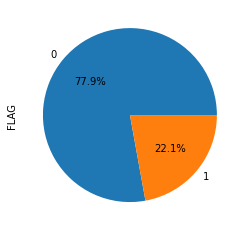

In [5]:
pie_data = df.FLAG.value_counts()
pie_data.plot.pie(autopct="%.1f%%");

#### Visual inspection of data

In [9]:
df1 = df.iloc[:,1:14]

columns_to_drop = range(2,14)
df2 = df.drop(df.columns[columns_to_drop], axis=1).iloc[:,1:12]

columns_to_drop = range(2,26)
df3 = df.drop(df.columns[columns_to_drop], axis=1).iloc[:,1:12]

columns_to_drop = range(2,38)
df4 = df.drop(df.columns[columns_to_drop], axis=1).iloc[:,1:]

In [10]:
sample = df1.sample(500).reset_index()
sample2 = df2.sample(500).reset_index()
sample3 = df3.sample(500).reset_index()
sample4 = df4.sample(500).reset_index()

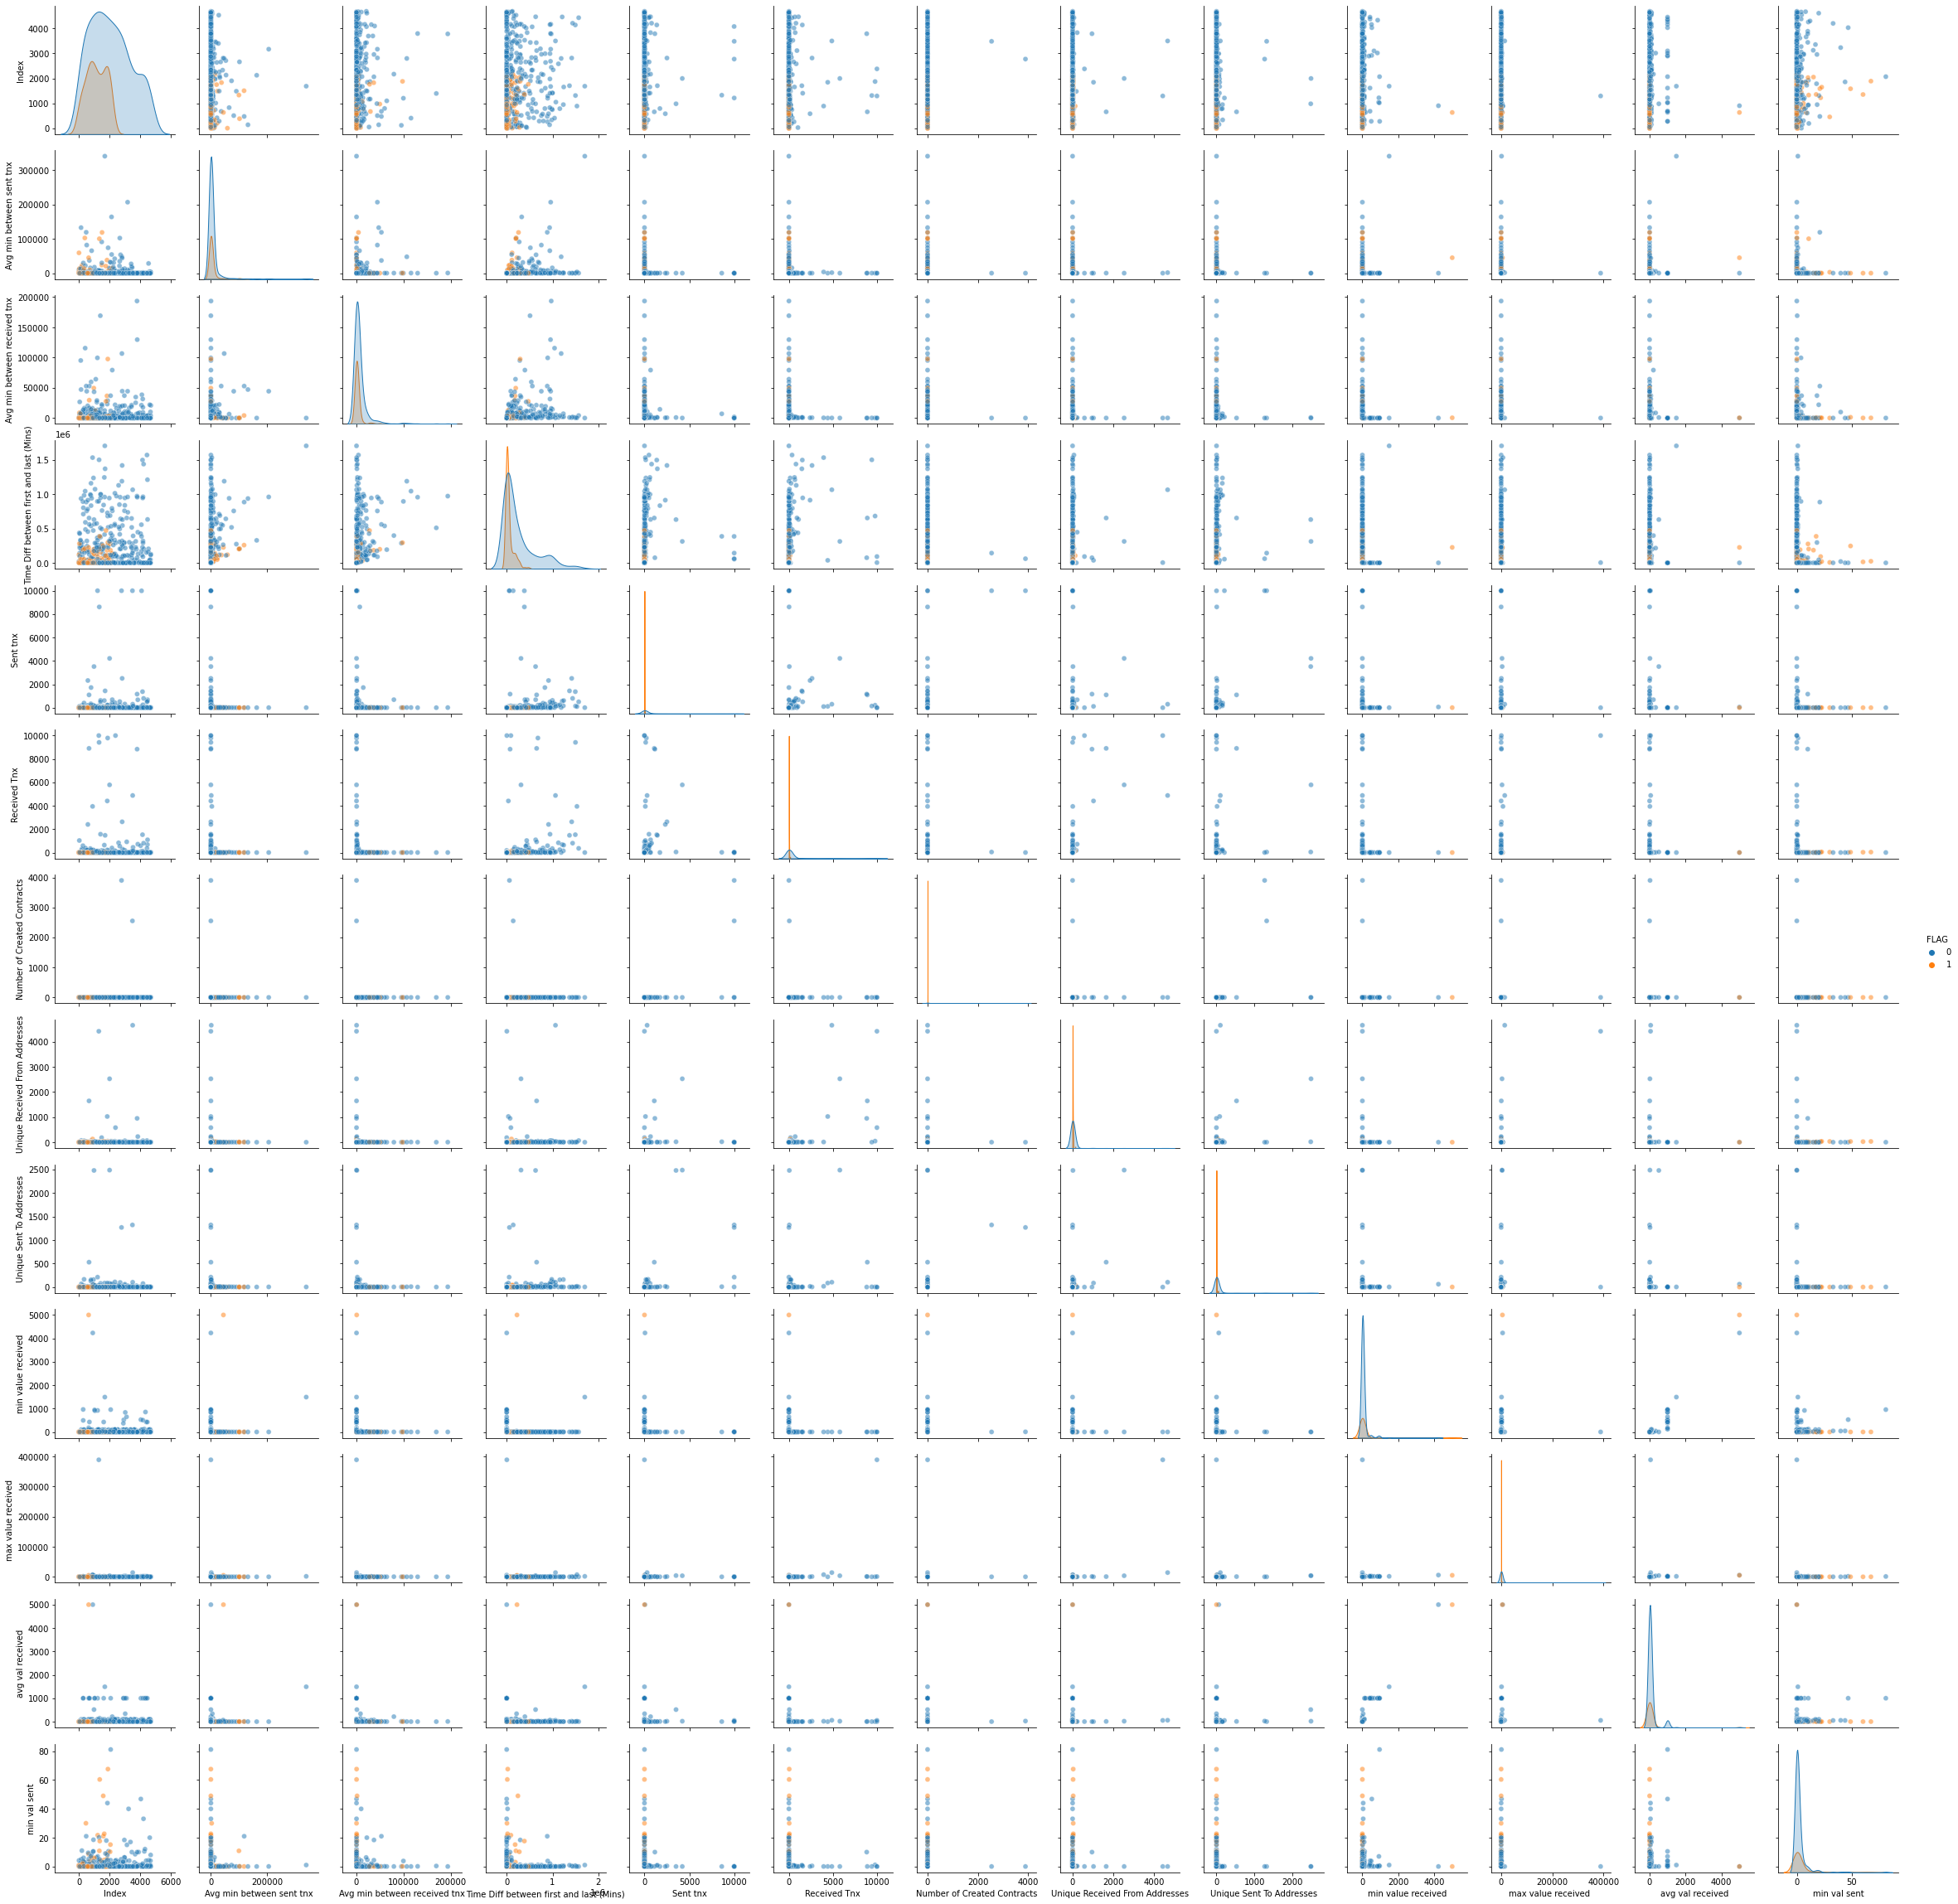

In [11]:
sns.pairplot(sample, hue="FLAG", plot_kws={'alpha':0.5})

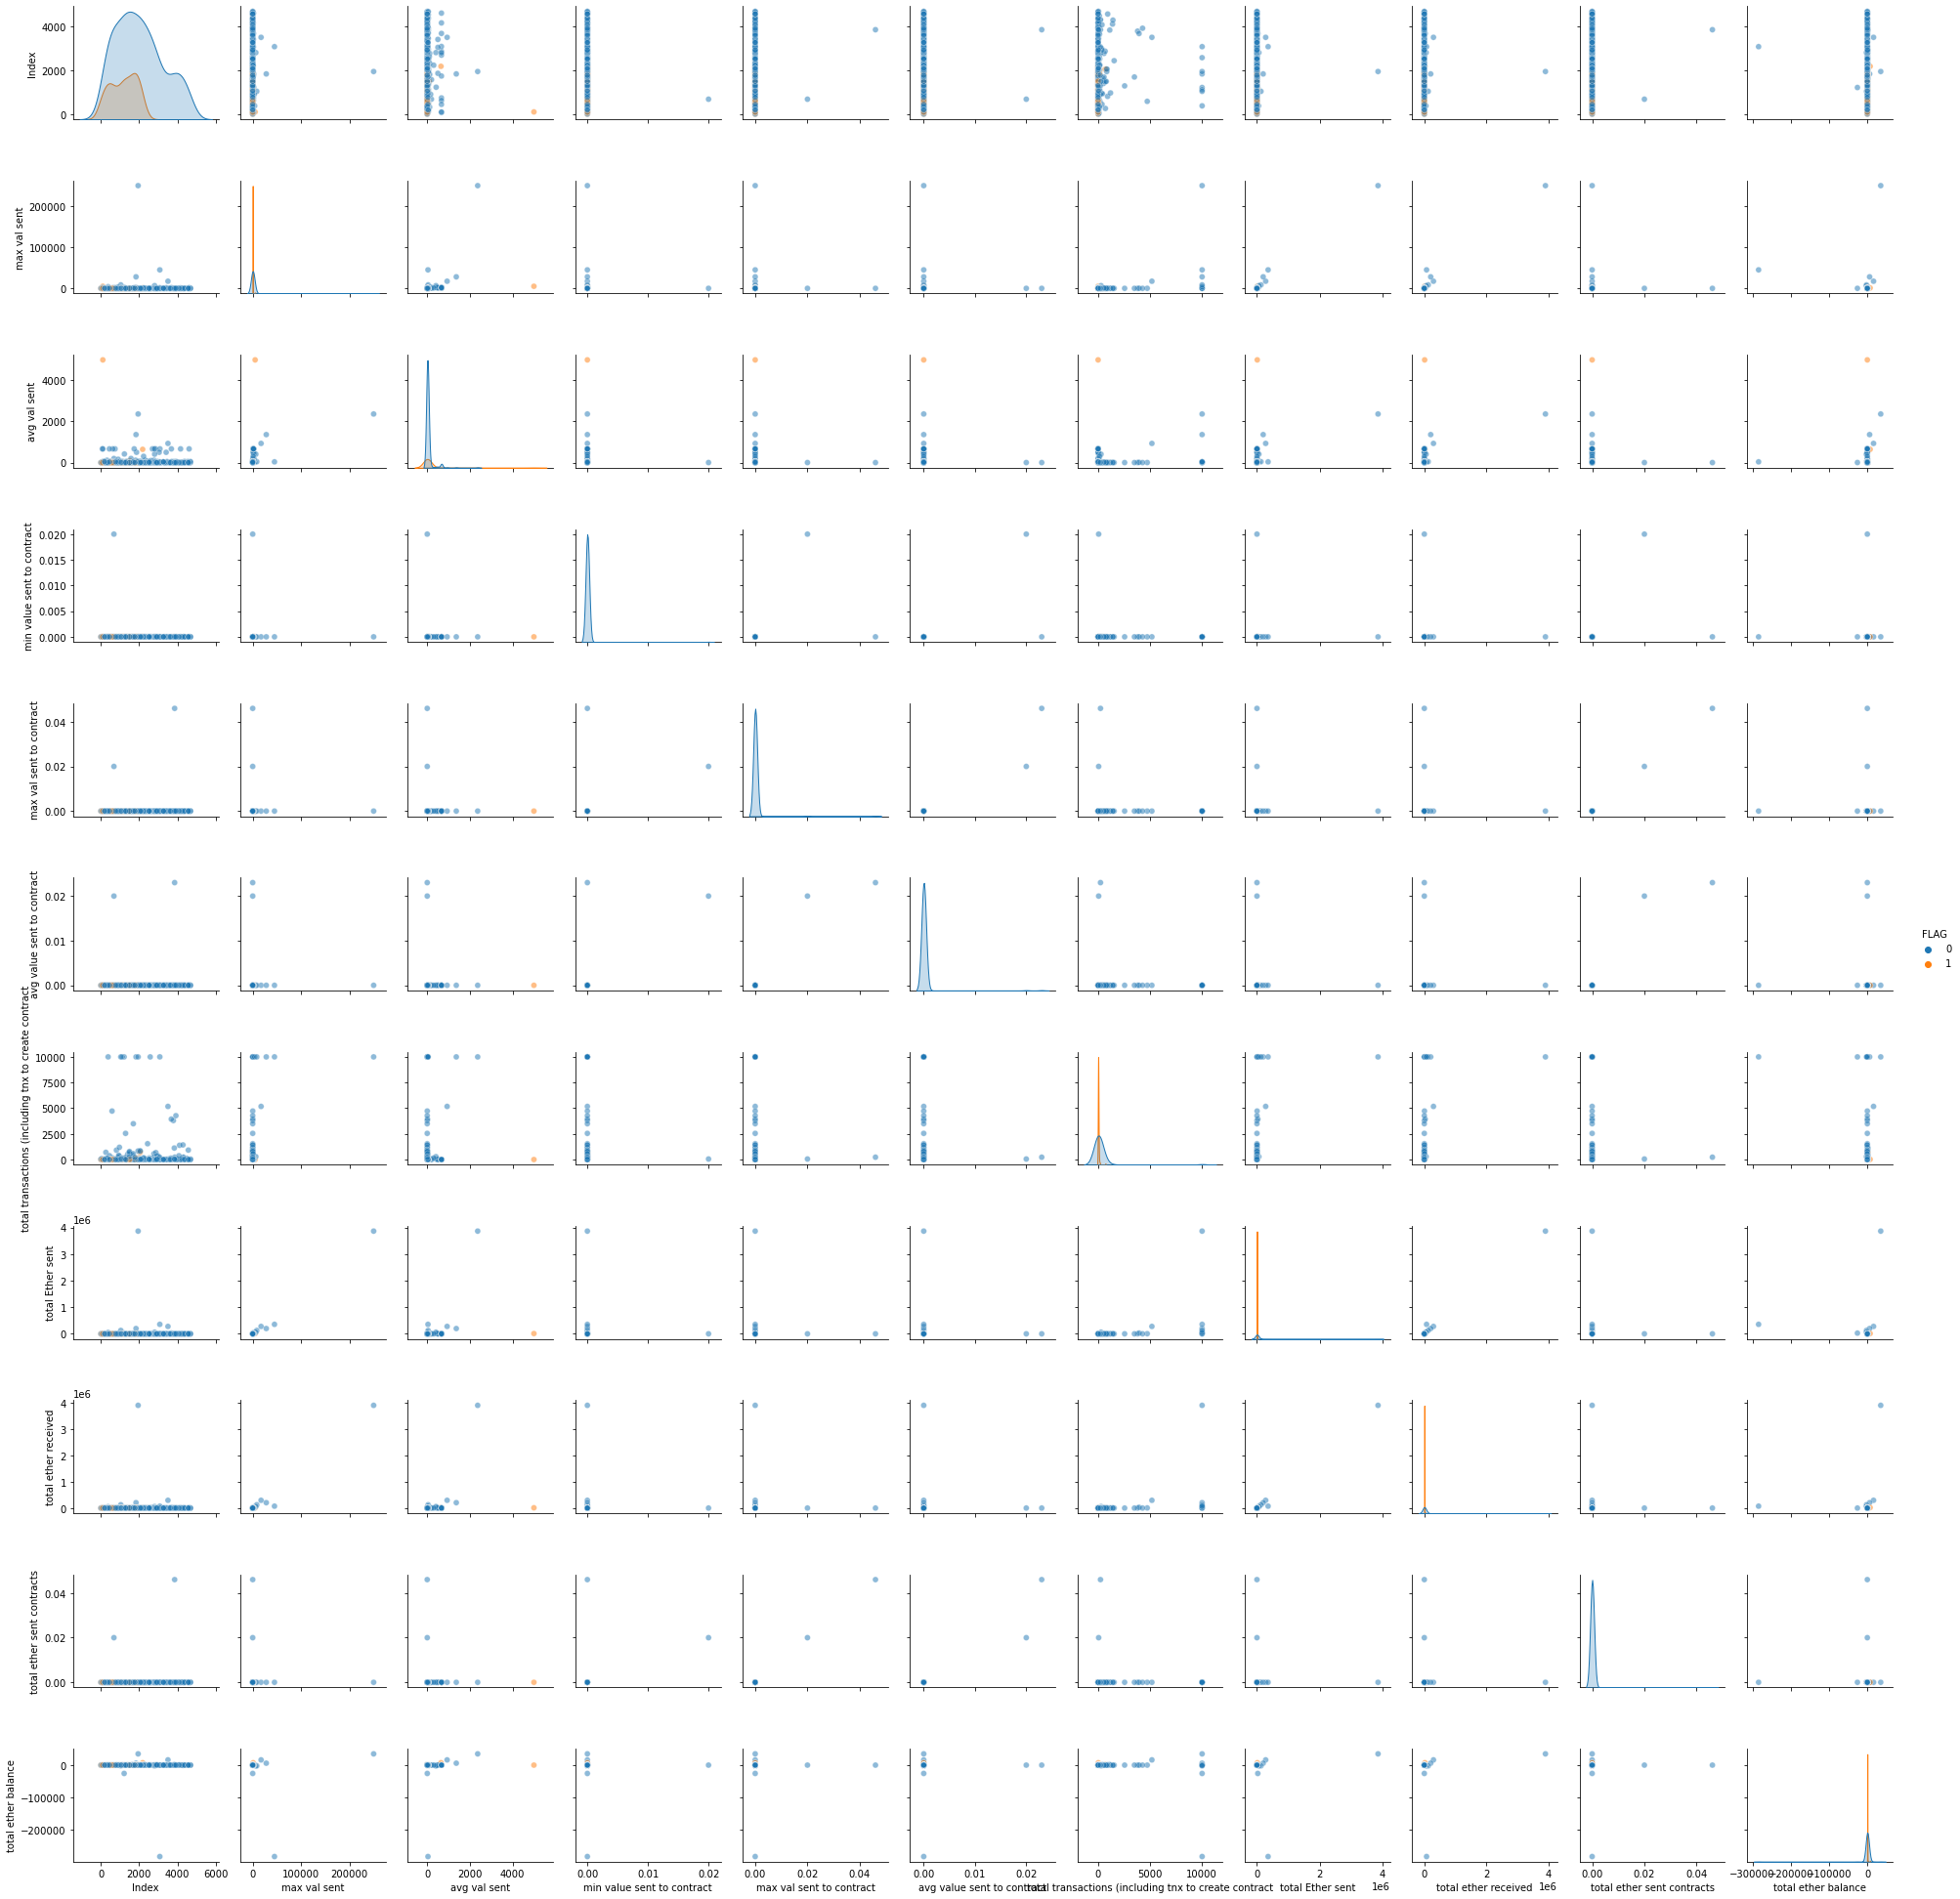

In [12]:
sns.pairplot(sample2, hue="FLAG", plot_kws={'alpha':0.5})

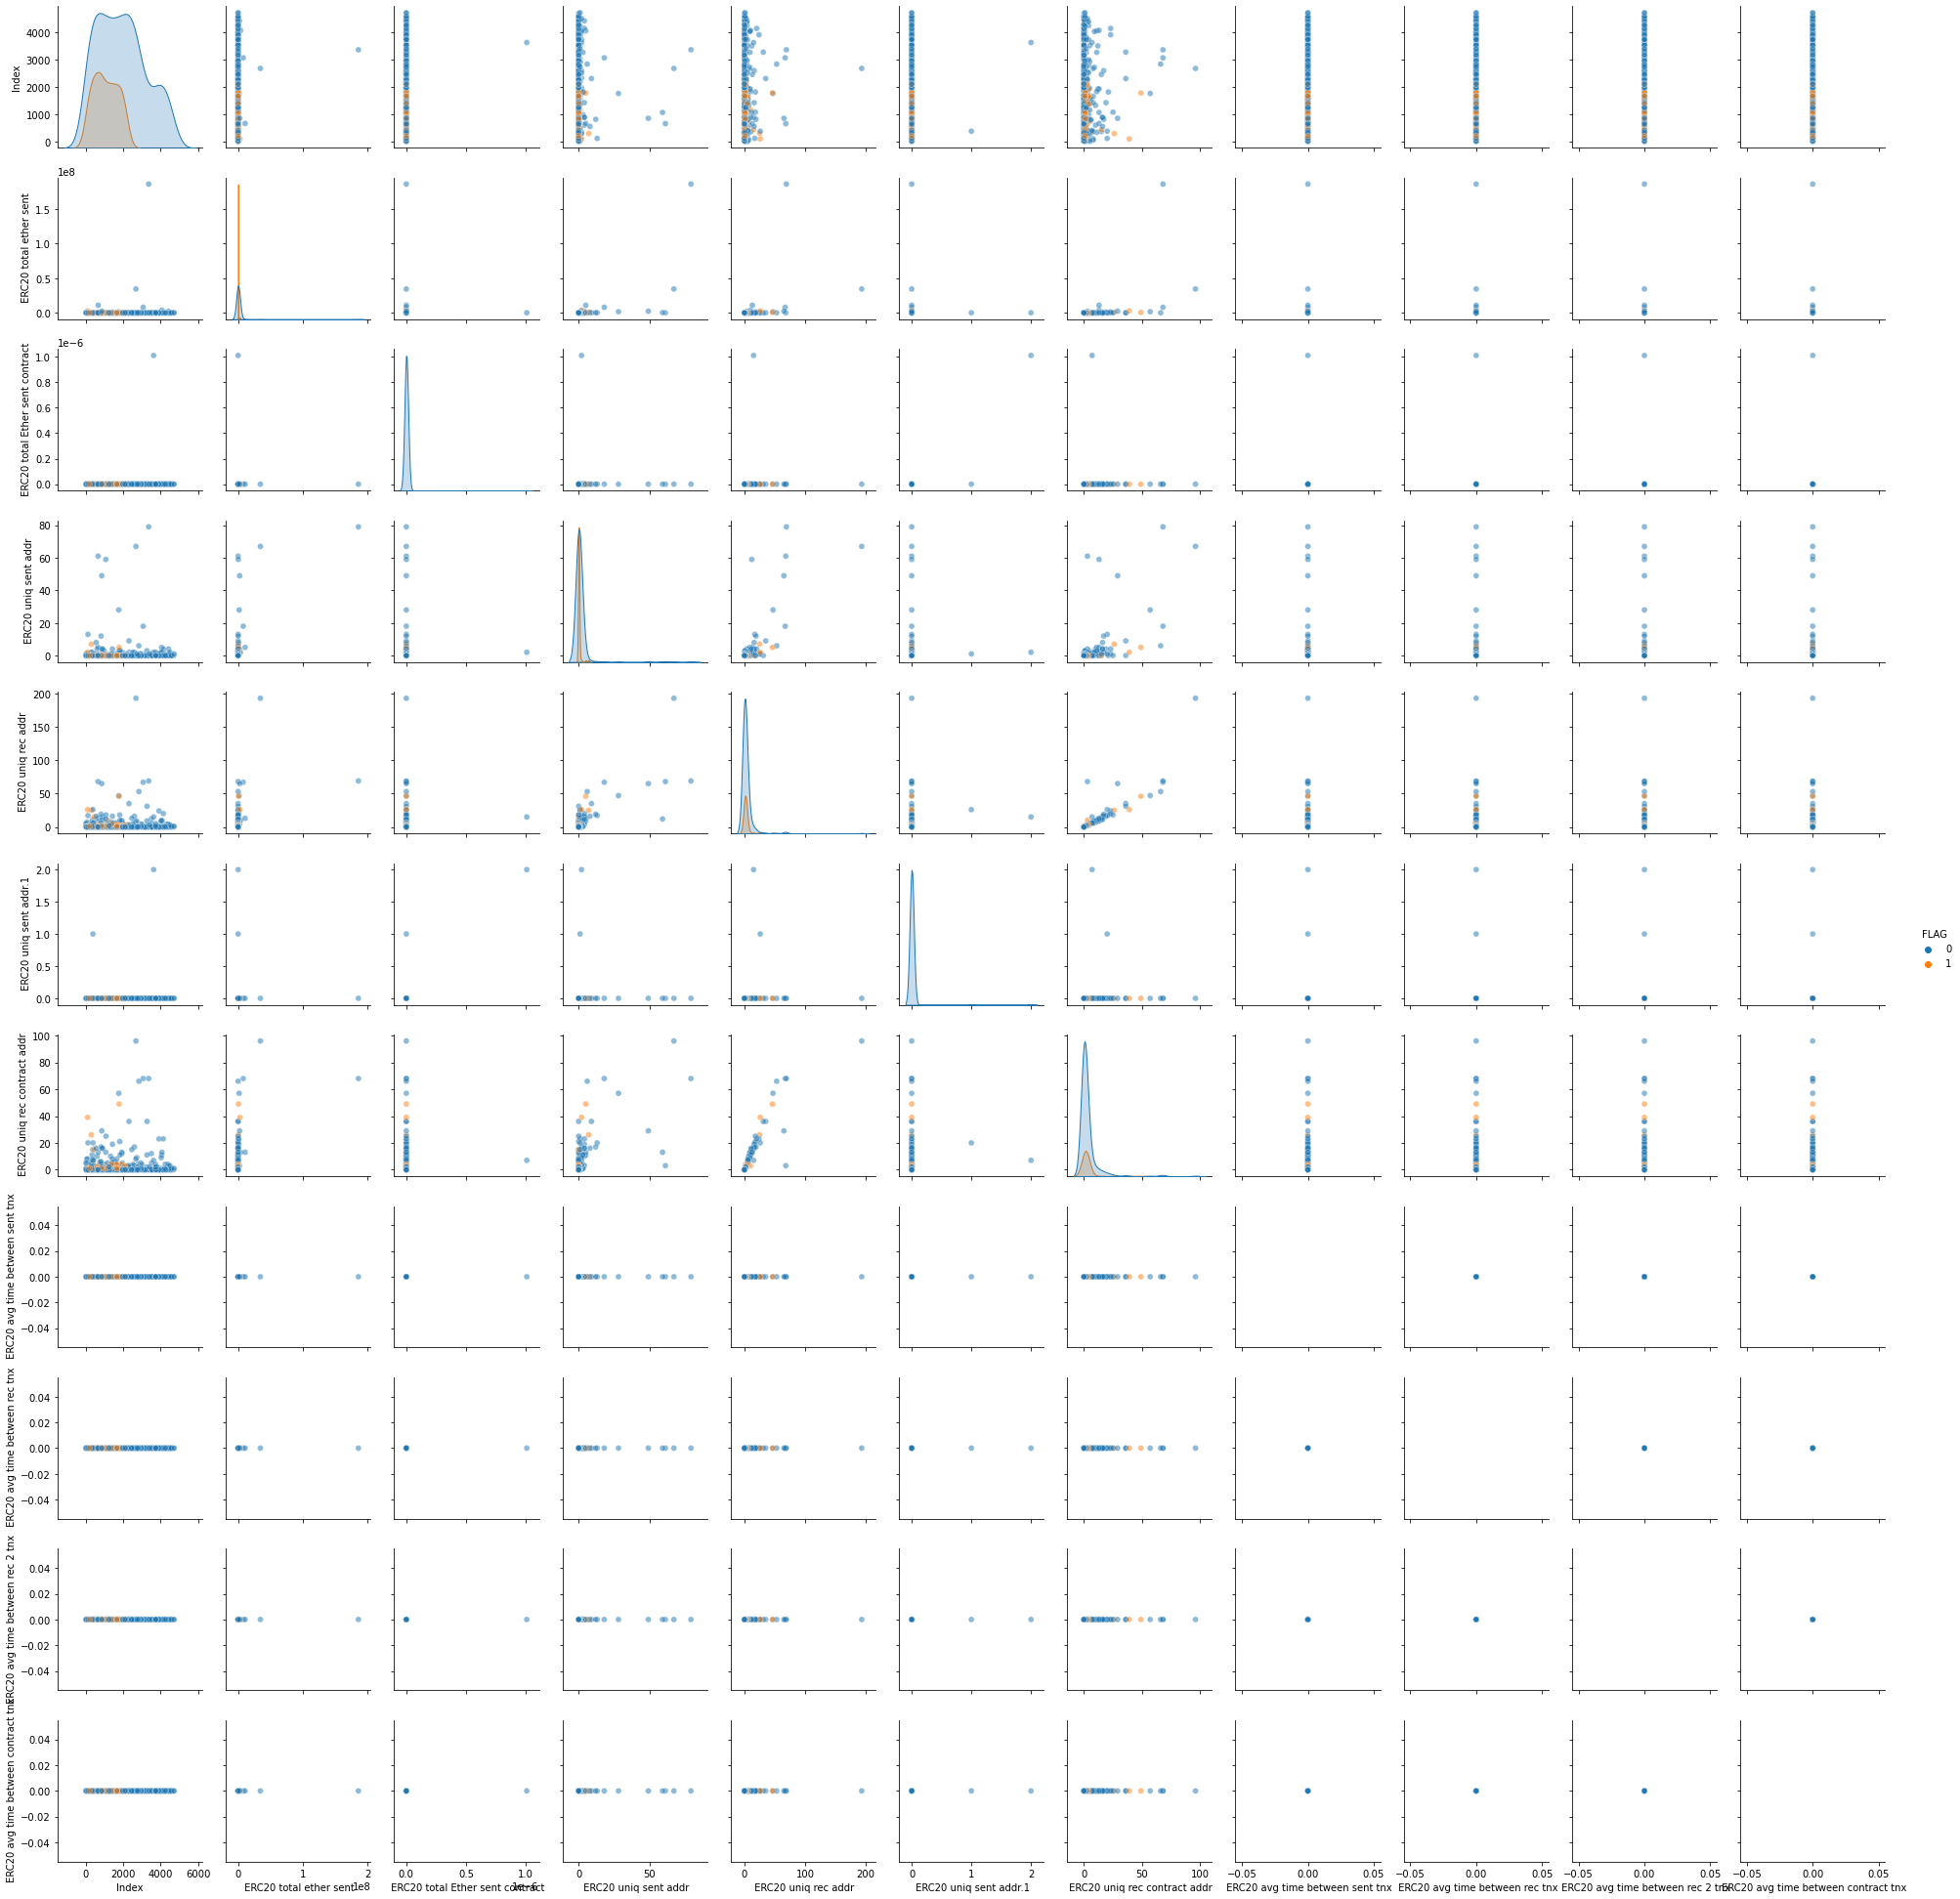

In [13]:
sns.pairplot(sample3, hue="FLAG", plot_kws={'alpha':0.5})

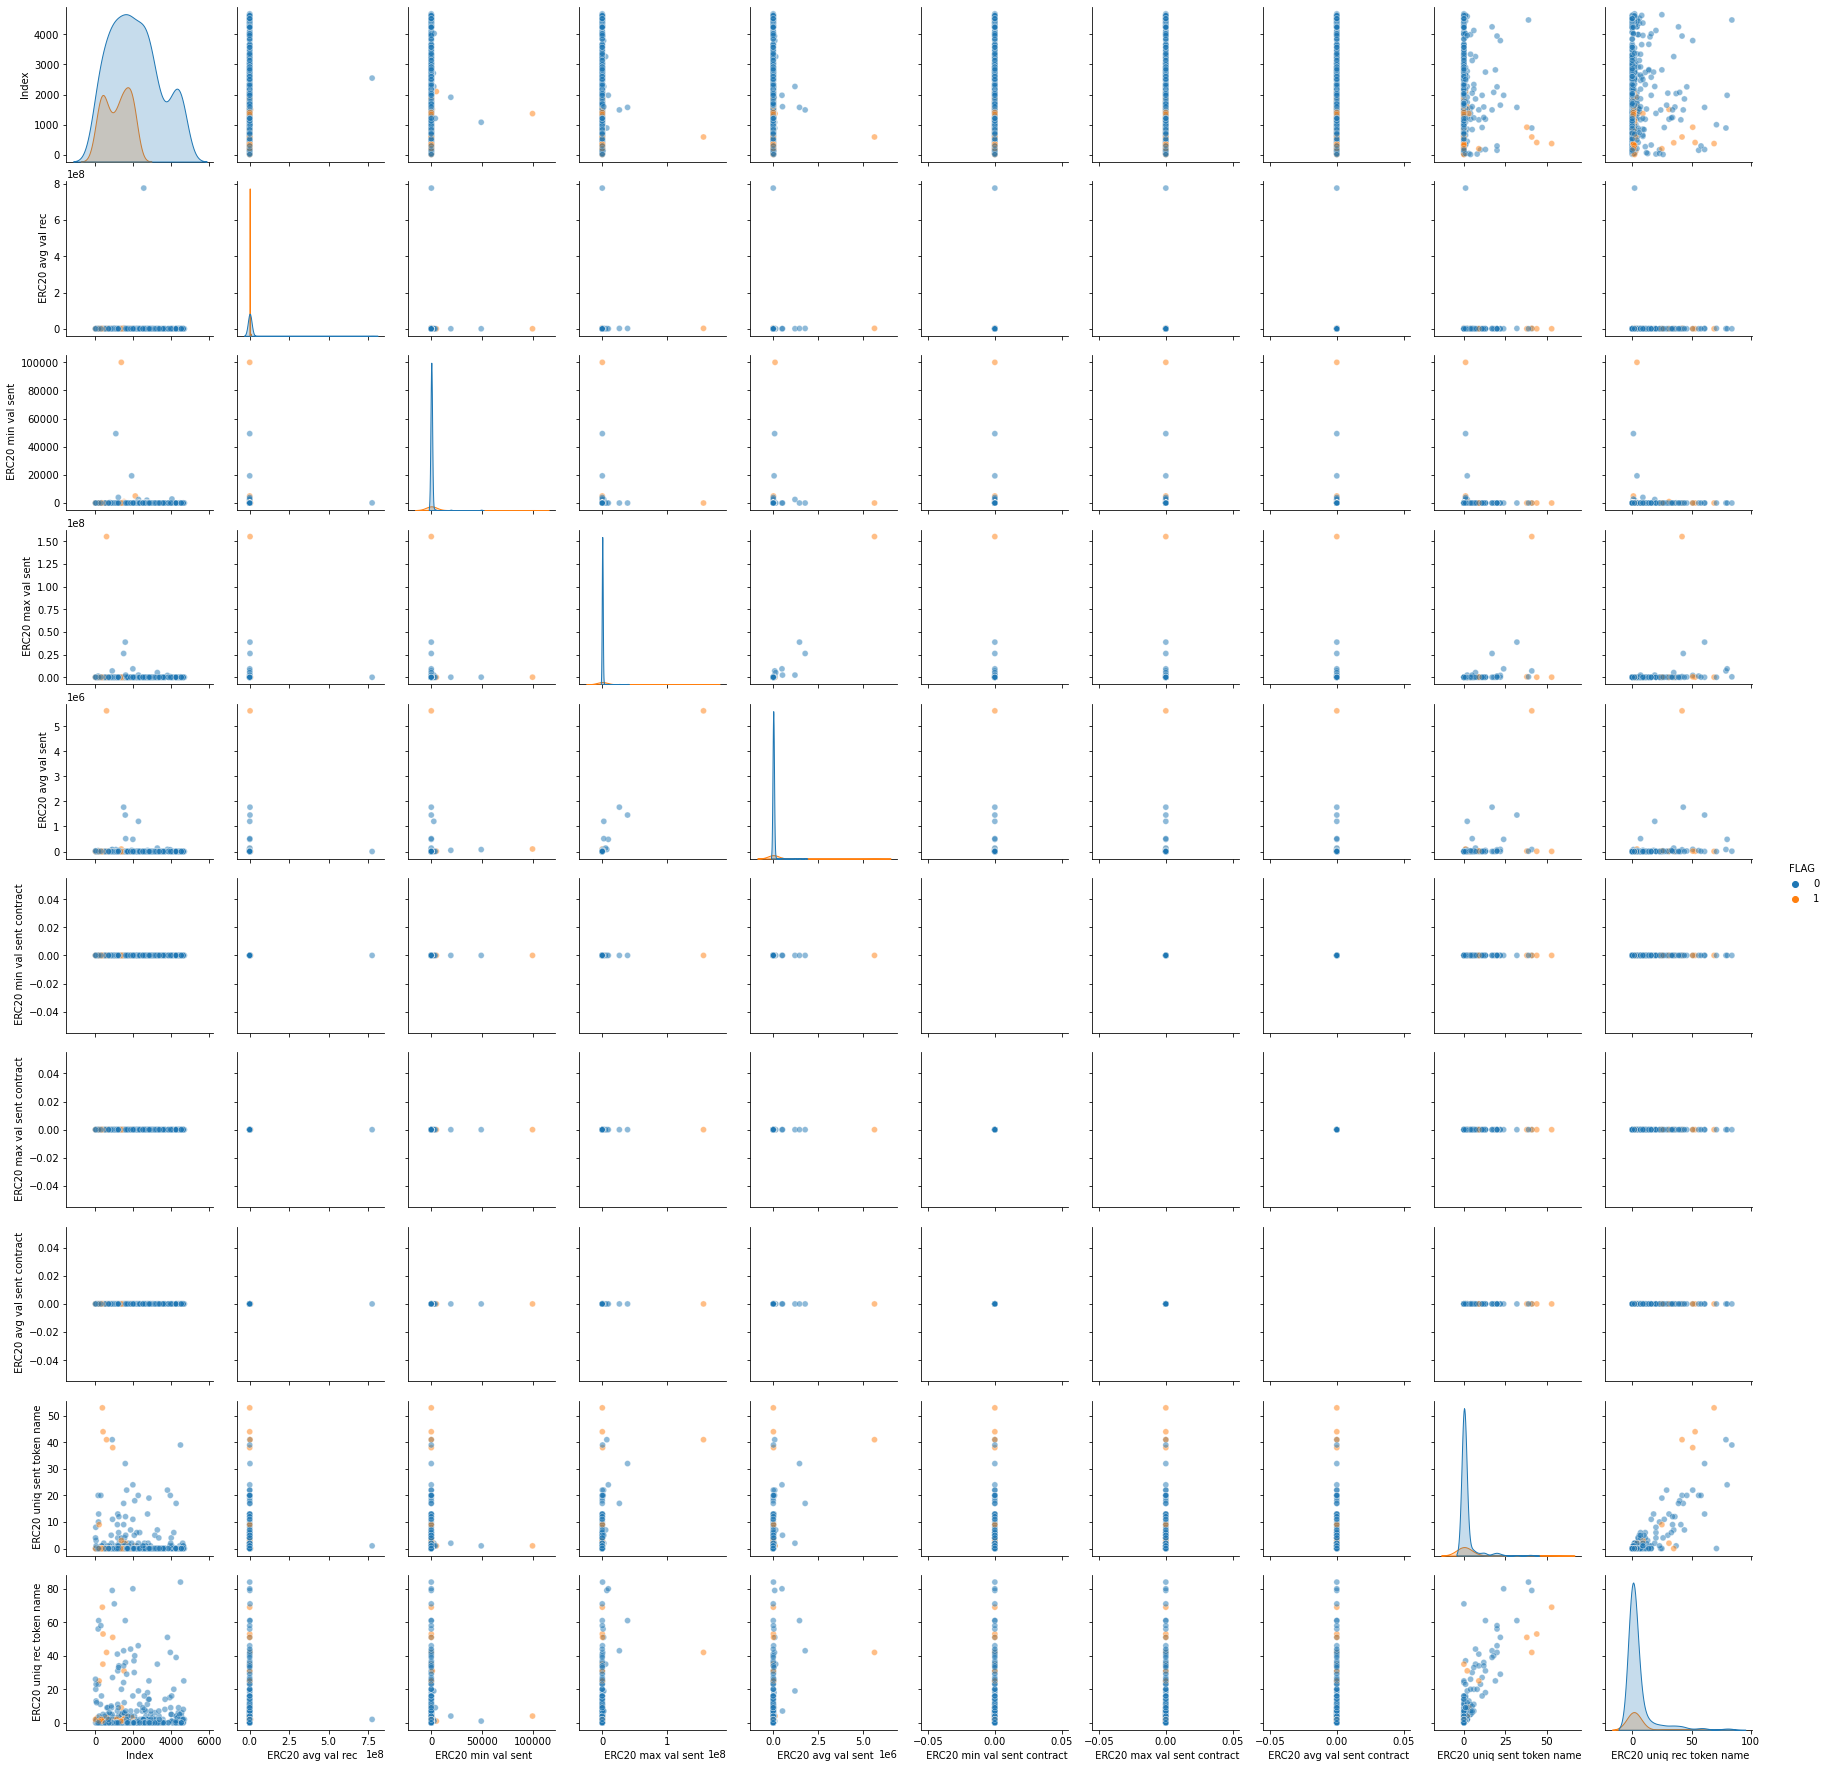

In [14]:
sns.pairplot(sample4, hue="FLAG", plot_kws={'alpha':0.5})

In [28]:
def distribution_visual(sample):
    idx = 1
    for i in sample.columns[2:]:
        idx += 1
        emptydf = pd.DataFrame()
        emptydf["flag"] = sample["FLAG"]
        emptydf["feat"] = sample[i]
        try:
            emptydf["interval"] = pd.cut(emptydf["feat"], bins=20, precision=0)

            var = emptydf.groupby("interval").flag.mean()

            chartdf = pd.DataFrame()
            chartdf["means"] = var
            chartdf["intervals"] = var.index

        #     exec (f"plt.subplot(grid{[i]})")
            sns.barplot(x="intervals", y="means", data=chartdf)
            plt.xticks(rotation=270)
            plt.title(i)
            plt.show()
        except TypeError:
            print(f"Skipping row number {idx}")
            pass

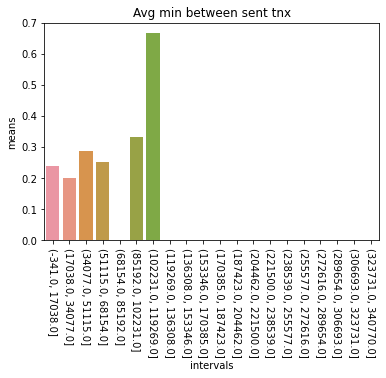

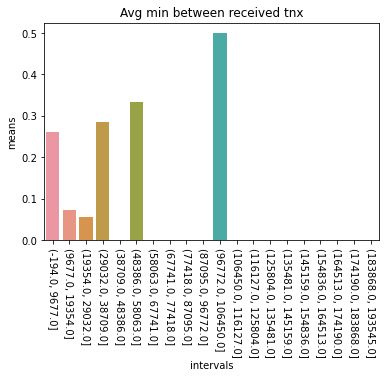

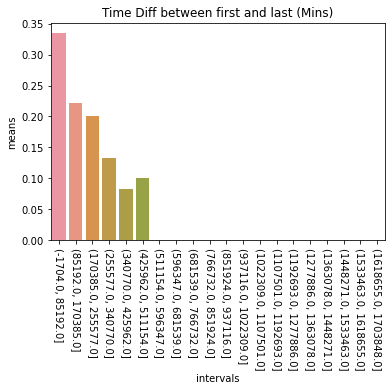

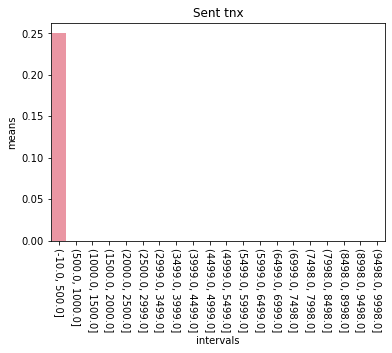

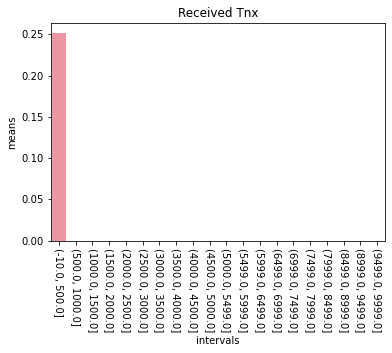

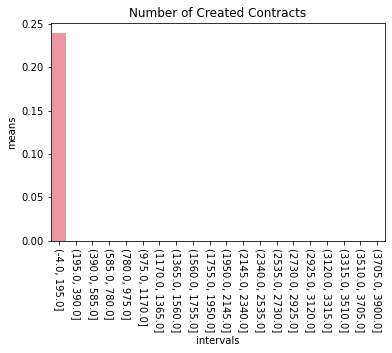

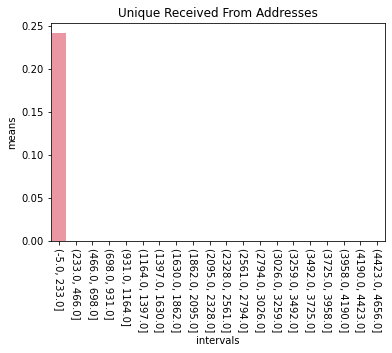

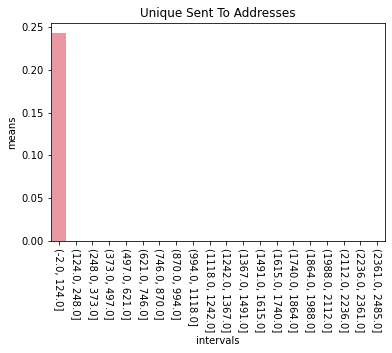

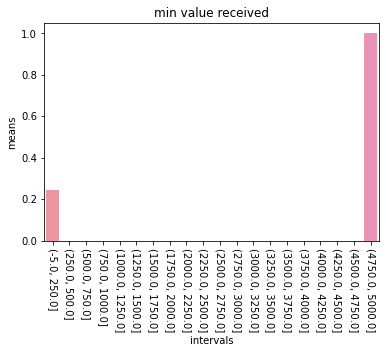

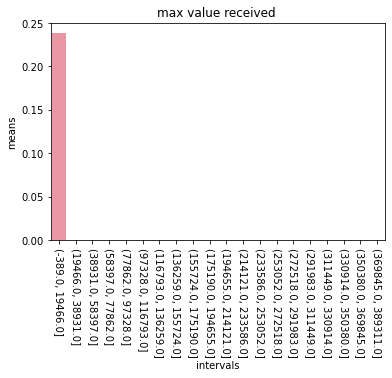

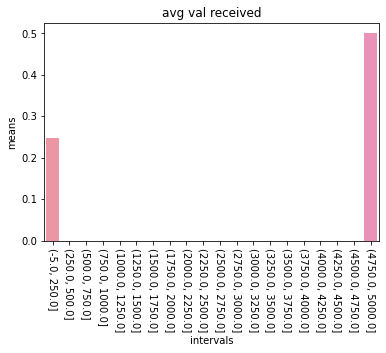

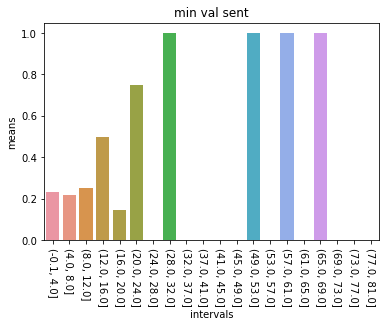

In [22]:
distribution_visual(sample)

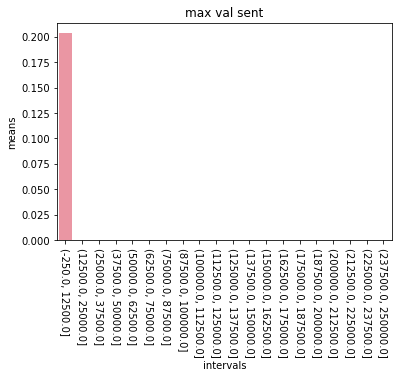

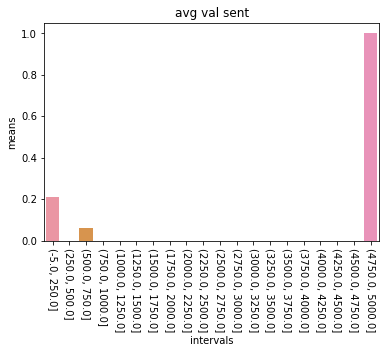

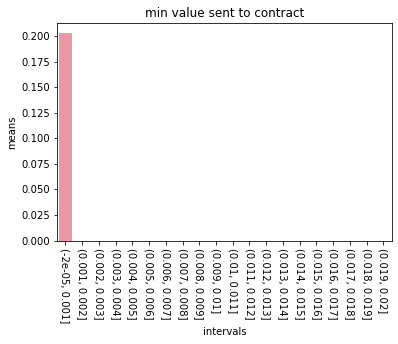

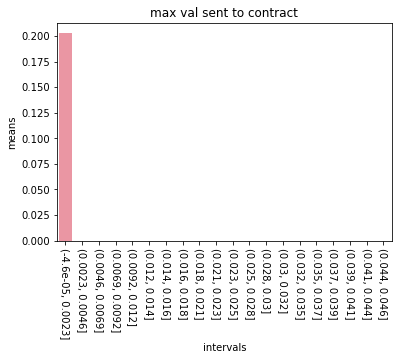

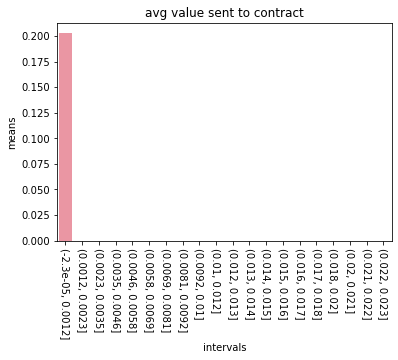

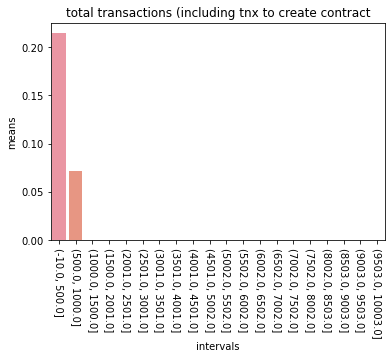

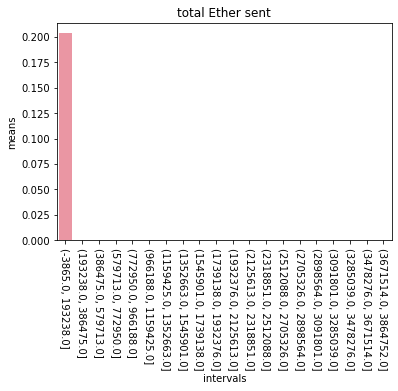

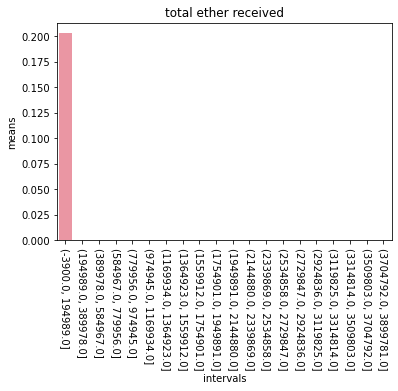

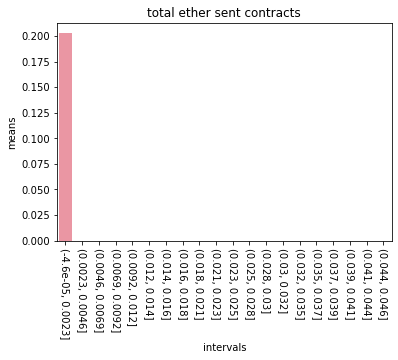

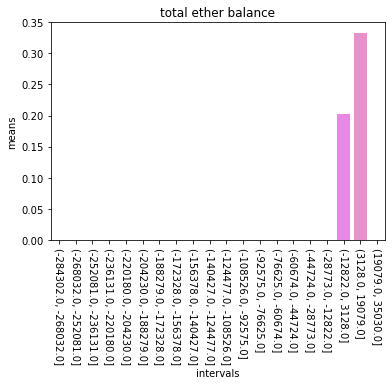

In [23]:
distribution_visual(sample2)

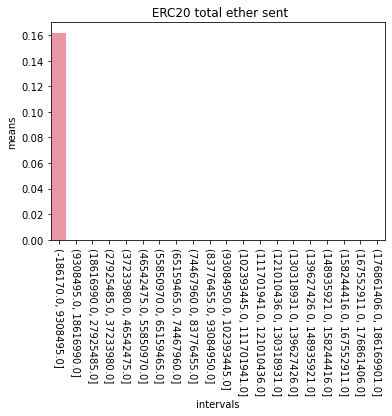

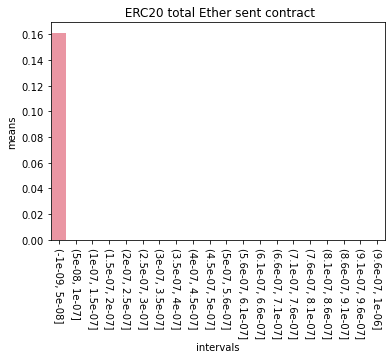

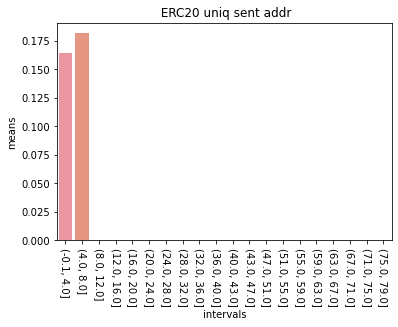

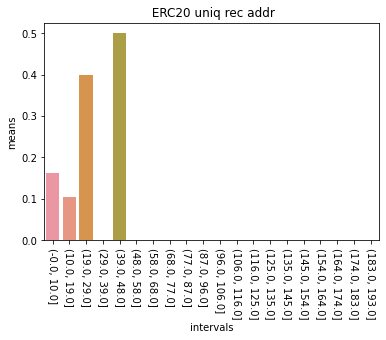

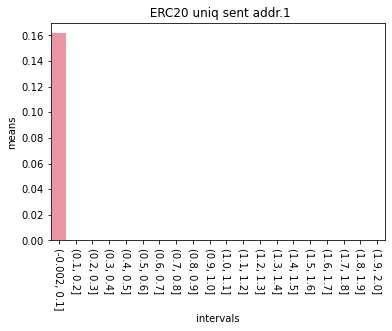

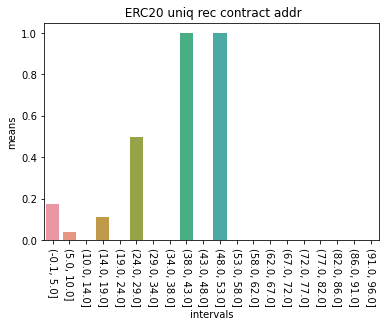

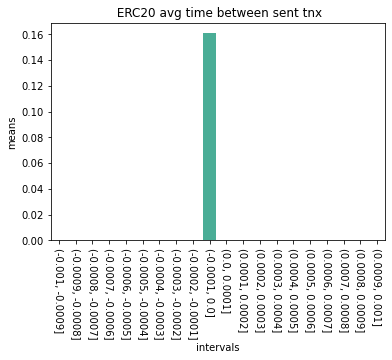

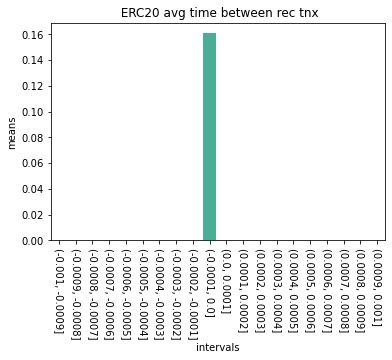

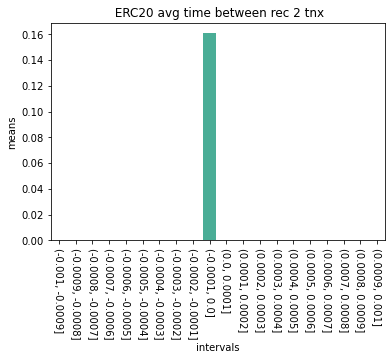

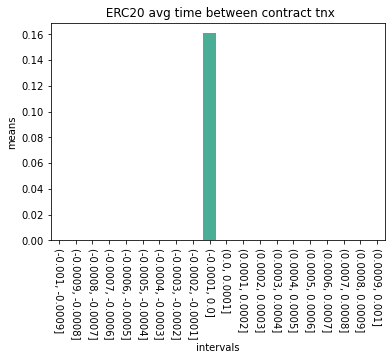

In [24]:
distribution_visual(sample3)

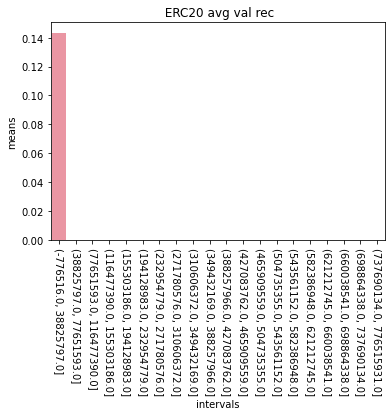

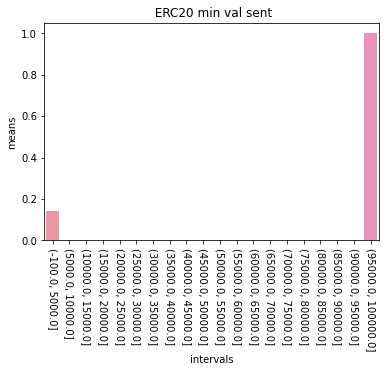

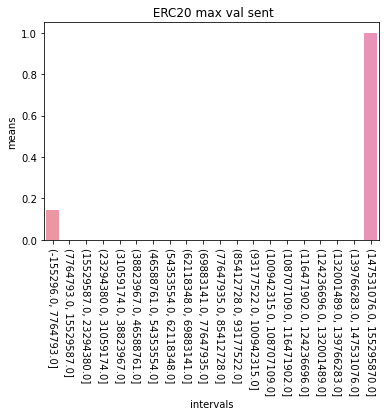

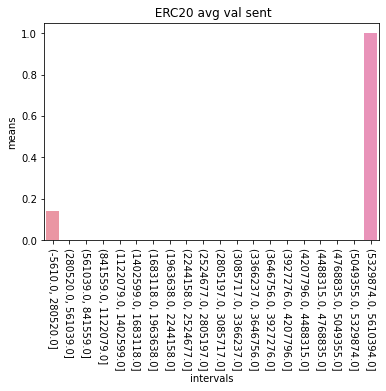

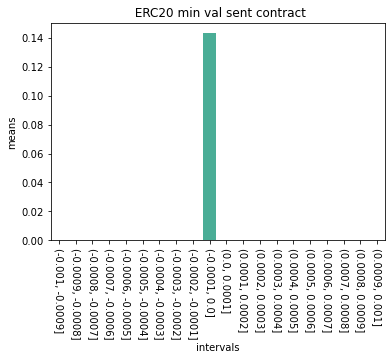

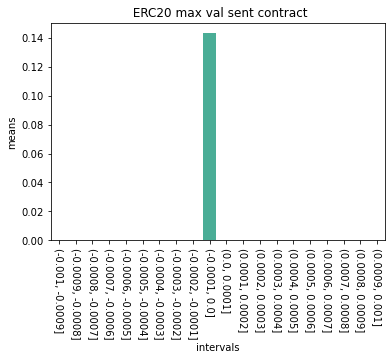

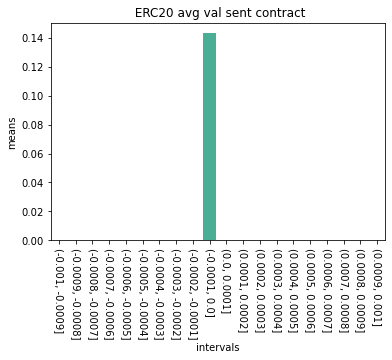

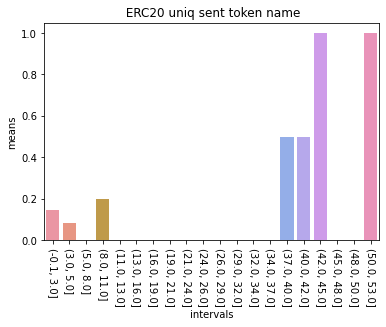

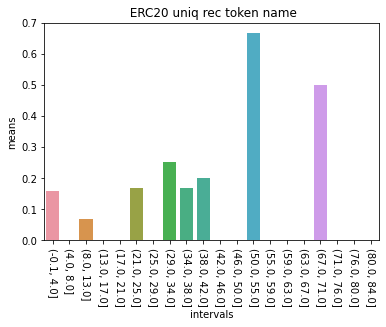

Skipping row number 11
Skipping row number 12


In [29]:
distribution_visual(sample4)

<AxesSubplot:xlabel='FLAG', ylabel='Time Diff between first and last (Mins)'>

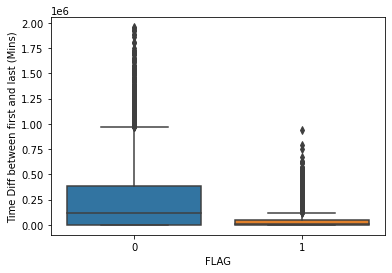

In [30]:
sns.boxplot(x = 'FLAG', y='Time Diff between first and last (Mins)', data=df)

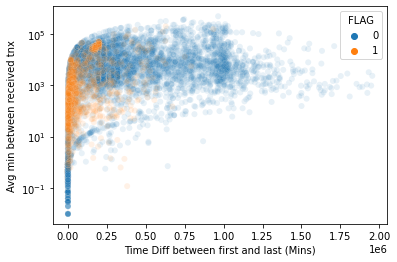

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.scatterplot(x=df["Time Diff between first and last (Mins)"], y=df["Avg min between received tnx"], \
                hue=df["FLAG"], alpha=0.1)
ax.set_yscale('log')

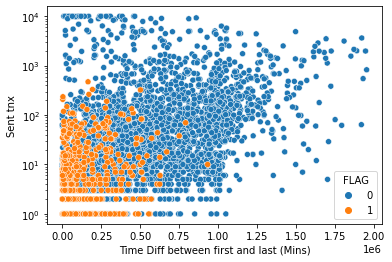

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.scatterplot(x=df["Time Diff between first and last (Mins)"], y=df["Sent tnx"], \
                hue=df["FLAG"])
ax.set_yscale('log')

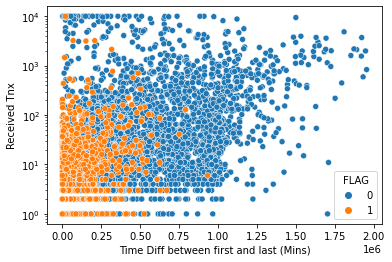

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["Time Diff between first and last (Mins)"], y=df["Received Tnx"], \
                hue=df["FLAG"])

ax.set_yscale('log')

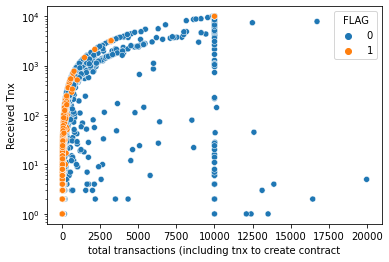

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["total transactions (including tnx to create contract"], y=df["Received Tnx"], \
                hue=df["FLAG"])

ax.set_yscale('log')

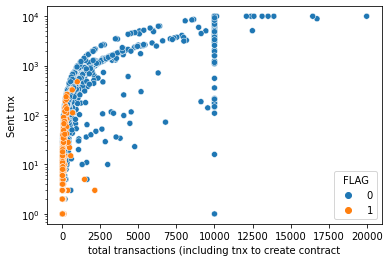

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["total transactions (including tnx to create contract"], y=df["Sent tnx"], \
                hue=df["FLAG"])

ax.set_yscale('log')

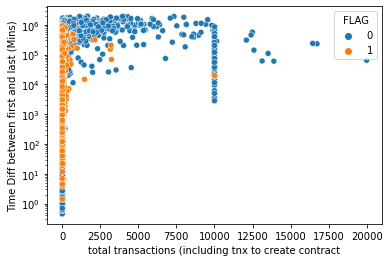

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["total transactions (including tnx to create contract"], y=df["Time Diff between first and last (Mins)"], \
                hue=df["FLAG"])

ax.set_yscale('log')

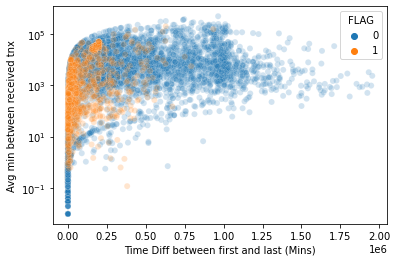

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["Time Diff between first and last (Mins)"], y=df["Avg min between received tnx"], \
                hue=df["FLAG"], alpha=0.2)

ax.set_yscale('log')

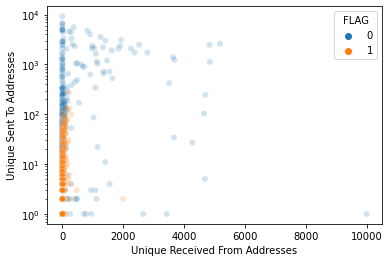

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["Unique Received From Addresses"], y=df["Unique Sent To Addresses"], \
                hue=df["FLAG"], alpha=0.2)

ax.set_yscale('log')

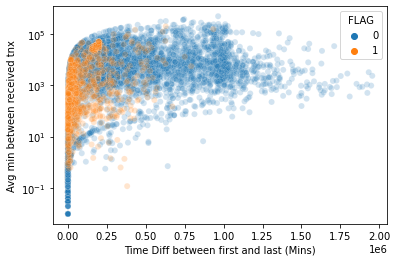

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(x=df["Time Diff between first and last (Mins)"], y=df["Avg min between received tnx"], \
                hue=df["FLAG"], alpha=0.2)

ax.set_yscale('log')